# k-Nearest Neighbors

## Iris dataset

**Import of the libraries useful for the analysis**

In [1]:
# pandas -> read input file and data manipulation
import pandas as pd
pd.set_option("float_format", "{:.2f}".format)

# numpy -> array manipulations
import numpy as np
np.set_printoptions(suppress=True)

# pandas, matplotlib & seaborn -> plotting
import matplotlib.pyplot as plt
import seaborn as sns

# custom script to plot decision boundaries
from decision_regions import plot_decision_regions

# sklearn -> data processing, models fit, make predictions and analyze the results
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# show sklearn objects in diagram
from sklearn import set_config
set_config(print_changed_only=False, display="diagram")

# warnings -> to silence warnings
from warnings import filterwarnings
filterwarnings("ignore")

**Load the iris dataset informations**  
The iris dataset contains the sepal and petal dimension about flowers of the iris species.

In [2]:
dataset = load_iris()

print(dataset["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

**Load the iris data**  
We can load the iris dataset using the function ```load_iris``` of scikit-learn.

In [3]:
df = load_iris(as_frame=True)["frame"]

**Definition of the X and y variables**  
Now we use the petal width variable too as predictor.

In [4]:
X = df[["petal length (cm)", "petal width (cm)"]].values
y = df["target"].values

**Split the dataset into training and test set**  
The parameter ```stratify=y``` allows to preserve the original structure of the data in the training and test set.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

## k-Nearest-Neighbors  model (k-NN)
The k-NN is a non parametric method that can be used for classification and regression tasks. With the k-NN algorithm the function is only approximated locally and all computation is deferred until function evaluation (lazy learning). Unlike the previous models studied since now, the k-NN algorithm can be used only for prediction tasks, because it doesn't return any value about the feature importances.  
The algorithm can be described according to these steps:  
1. **learning phase**: the space is partitioned into regions based on the locations and characteristics of the learning objects
2. **distance calculation**: for the purpose of calculating the distance, objects are represented through position vectors in a multidimensional space
3. **prediction**: compute the prediction using the nearest neighbors 

The prediction output depends on whether k-NN is used for classification or regression:
* In classification tasks, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k=1, then the object is simply assigned to the class of that single nearest neighbor
* In regression tasks, the value is the average of the values of k nearest neighbors, weighed by the distances

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/1024px-KnnClassification.svg.png width="500">

Since this algorithm relies on distance for prediction, normalizing the training data can improve its accuracy dramatically. It's also very important to know that the results could be very bad if we apply the algorithm to high dimensional data, because using the euclidean distance all vectors are almost equidistant (this problem is known as the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)).

### k-Nearest Neighbors Classifier

**Definition of the k-nearest neighbors model object and fit to the data**  
Since the algorithm uses the distances among observations to compute the predictions, the ```metric``` and ```n_neighbors``` parameters are extremely important.
* **metric**: the choice of the metric depends on the data that we are analyzing and the task we want to accomplish
* **n_neighbors**: the number of the neighbors is crucial and a wrong value can lead to very bad results


documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [6]:
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**Compute the accuracy on the test data**  
We accomplished an accuracy score of ~0.96 which is very good. But we could test if we can get better results by changing the neighbors value.

In [7]:
knn.score(X_test, y_test)

0.9666666666666667

**Fit of the model considering various values of neighbors**  
We can use a loop to fit the model with different values of neighbors and check the obtained accuracy.

**NB** since we have the features in the same scale, it's not necessary to scale the data before the fit of the model.

In [8]:
knn_accuracy = []

for k in range(1, X_train.shape[0], 2):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X=X_train, y=y_train)
    knn_accuracy.append({"# neighbors": k, "accuracy": knn.score(X_test, y_test)})

df_accuracy = pd.DataFrame(knn_accuracy)
df_accuracy

,# neighbors,accuracy
0,1,0.97
1,3,0.97
2,5,0.97
3,7,0.97
4,9,0.97
5,11,0.97
6,13,0.97
7,15,0.97
8,17,0.97
9,19,0.97


**Show the plot with the accuracy values given different values of neighbors**  
As we can see from the plot, for values of neighbors from 1 to 23 we obtained the best accuracy results. We can also notice that for values of neighbors > 80 the accuracy score rapidly decreases. This happens because the value of neighbors define the shape of the decision boundary of the model.

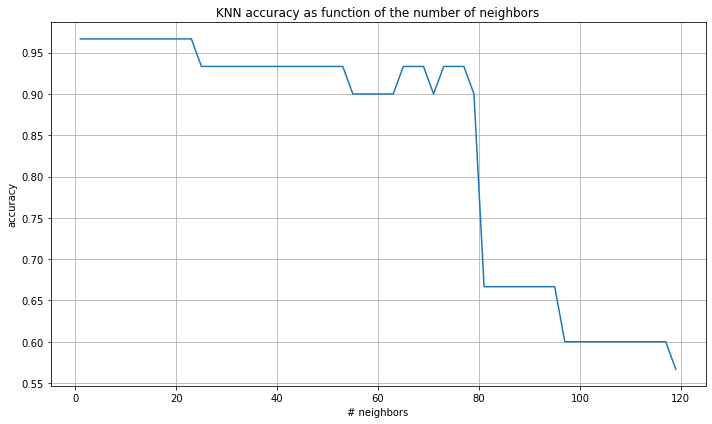

In [9]:
plt.figure(figsize=(10, 6))
plt.title("KNN accuracy as function of the number of neighbors")
sns.lineplot(x="# neighbors", y="accuracy", data=df_accuracy)
plt.grid()
plt.tight_layout()
plt.show()

**Analysis of the decision boundaries for different values of neighbors**  
We fit the k-NN algorithm for small and big values of neighbors to compare the obtained decision boundaries.

**Fit the k-NN algorithm with k = 1**

In [10]:
knn_small = KNeighborsClassifier(n_neighbors=1)
knn_small.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Fit the k-NN model with k=119**

In [11]:
knn_big = KNeighborsClassifier(n_neighbors=119)
knn_big.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=119, p=2,
                     weights='uniform')

**Plot the decision boundaries for k=1 and k=119**  
As can be seen from the graph, with lower values of k neighbors the decision boundary tends to be more jagged whereas for higher values of k neighbors the decision boundary tends to be more linear.

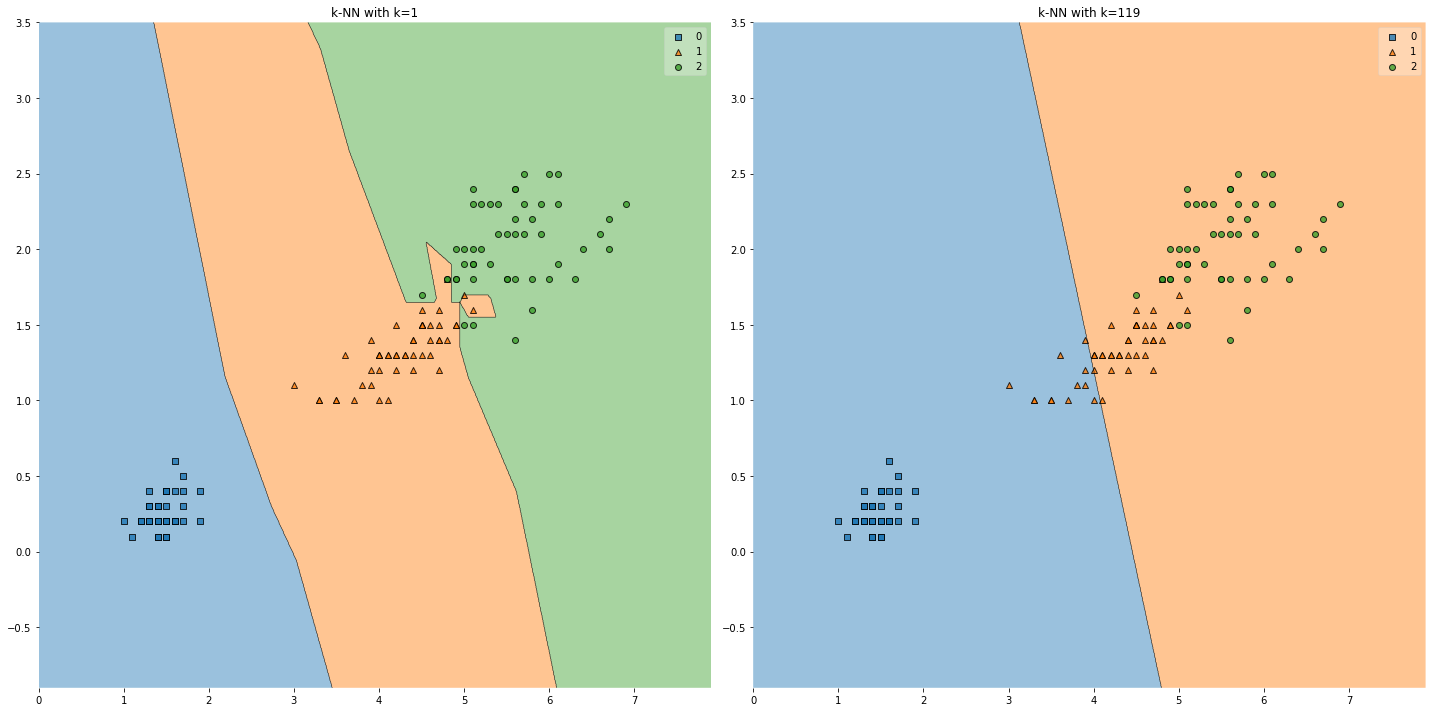

In [12]:
fig = plt.figure(figsize=(20, 10))
ax = fig.subplots(nrows=1, ncols=2)
plot_decision_regions(X=X, y=y, clf=knn_small, ax=ax[0])
plot_decision_regions(X=X, y=y, clf=knn_big, ax=ax[1])
ax[0].set_title("k-NN with k=1")
ax[1].set_title("k-NN with k=119")
plt.tight_layout()
plt.show()

### k-Nearest Neighbors Regressor

**Load the advertising dataset**

In [13]:
df = pd.read_csv("data/advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


**Definition of the X and y variables**  
In this case, we use only the variable *TV* as predictor for *sales*.

In [14]:
X = df[["TV"]].values
y = df["sales"].values

**Fit the models to the data**  
We fit the k-NN regressors with different neighbors values in order to compare the obtained regression lines.

In [15]:
knn_predictions = {}

for k in [1, 50, 100, 200]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X=X, y=y)
    knn_predictions[k] = knn.predict(X)
    
df_predictions = pd.DataFrame(knn_predictions)
df_predictions

,1,50,100,200
0,22.10,17.66,17.51,14.02
1,10.40,9.52,10.54,14.02
2,9.30,8.39,10.54,14.02
3,18.50,14.67,14.93,14.02
4,12.90,16.58,16.10,14.02
...,...,...,...,...
195,7.60,8.65,10.54,14.02
196,9.70,11.82,11.59,14.02
197,12.80,15.90,16.00,14.02
198,25.50,18.47,17.51,14.02


**Plot of the regression lines**  
As can be seen from the graph, for a low number of neighbors the regression line tends to follow the single points, while for higher values the regression line tends to be more linear.

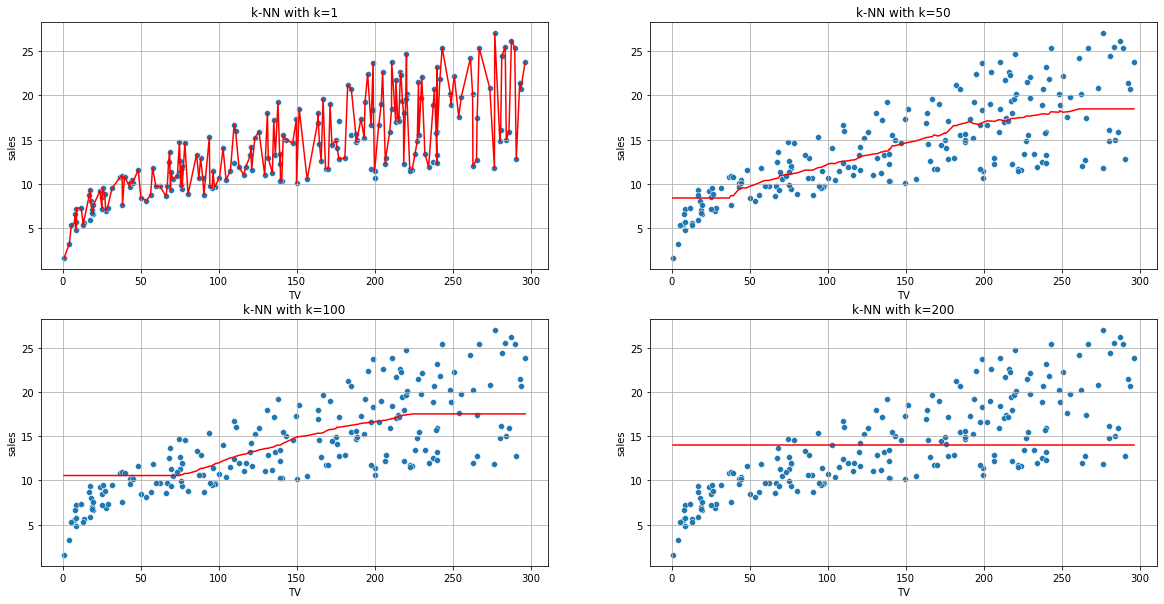

In [16]:
fig = plt.figure(figsize=(20, 10))
axes = fig.subplots(nrows=2, ncols=2)
for ax, column in zip(axes.flat, df_predictions.columns):
    sns.scatterplot(x="TV", y="sales", data=df, ax=ax)
    sns.lineplot(x=df["TV"], y=df_predictions[column], color="red", ax=ax)
    ax.set_title(f"k-NN with k={column}")
    ax.grid()

# <font color= "blue"> K-Nearest Neighbors </font>
- **supervised model**: the data must have the target variable
- **non parametric model**: don't make any assumption about the shape of the function
    
#### <font color= "green"> Pros: </font>
* Very easy to understand how it works
* Can be used for regression and classification problems
* Can interpret linear and non linear relationships

#### <font color= "red"> Contros: </font>
* Can be used only for prediction
* The computation time can be high with high dimensional data
* Sensitive to the scale of the data

**Use when**: you have a prediction task with a low dimensional dataset and there is the target variable.